### Import libraries

In [1]:
import pandas as pd
import pyflux as pf
from datetime import datetime

### Import Data

In [2]:
data_train_a = pd.read_csv("../Datasets/CPU/cpu-train-a.csv", parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv("../Datasets/CPU/cpu-test-a.csv", parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


### Visualize the data

Text(0.5, 1.0, 'CPU Utilization')

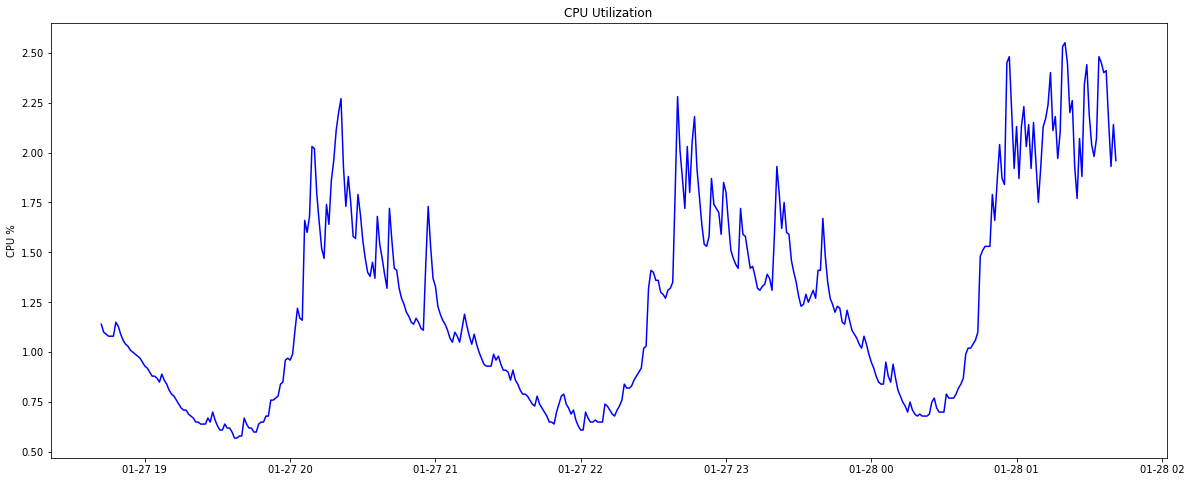

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='blue')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

### Use ARIMA model on the data

In [6]:
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.04045
Acceptance rate of Metropolis-Hastings is 0.23685

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.3633


### Visualize the model

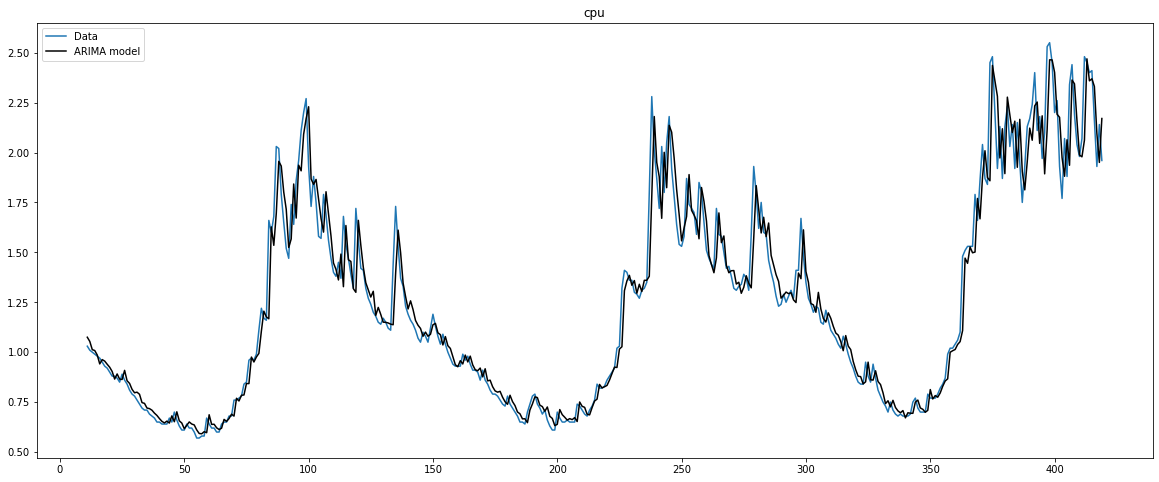

In [7]:
model_a.plot_fit(figsize=(20,8))

### Model fitted over time with ARIMA model prediction

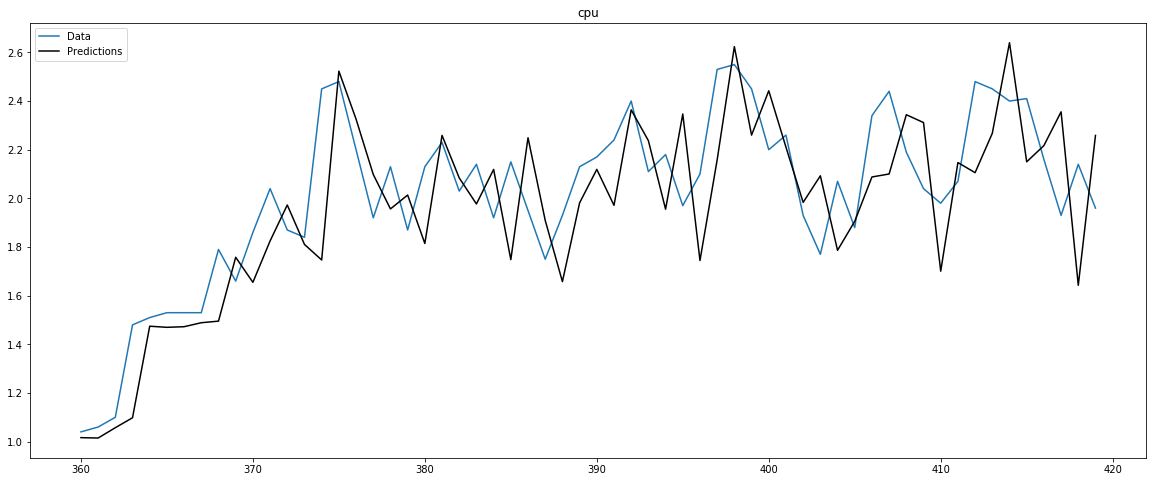

In [8]:
model_a.plot_predict_is(h=60, figsize=(20,8))

### 100 Receent observed data points followed by 60 predicted points

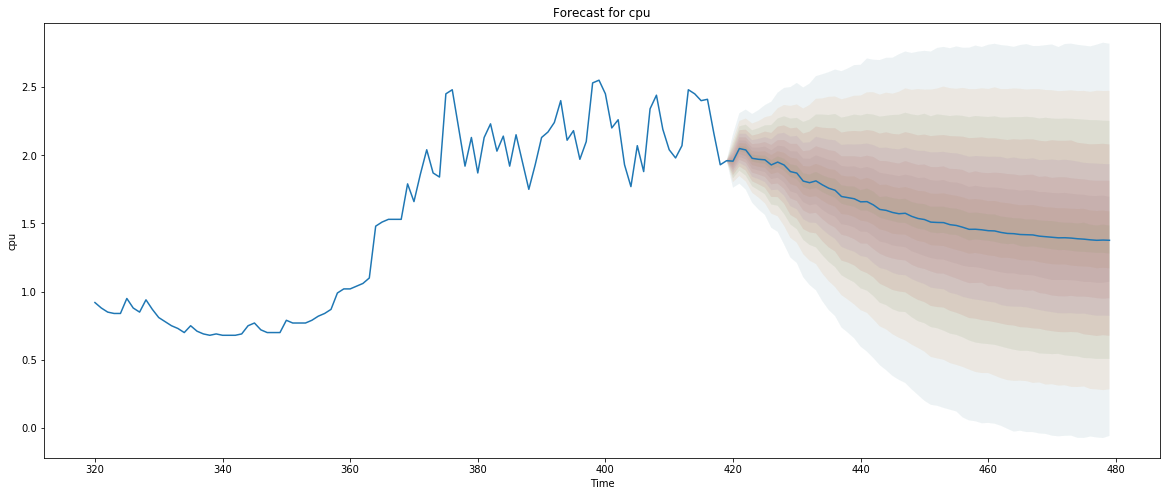

In [9]:
model_a.plot_predict(h=60, past_values=100, figsize=(20,8))